# Transformers

In [1]:
!pip install unidecode

In [2]:
import re
import torch
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Iterator
from numpy.typing import NDArray
from dataclasses import dataclass
from torch.nn import functional as F
from unidecode import unidecode
from functools import reduce
from tqdm.notebook import tqdm

nltk.download('punkt_tab')
plt.style.use("ggplot")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
text = """
A medianoche, en el mes de junio,
permanezco de pie bajo la mística luna.
Un vapor de opio, como de rocío, tenue,
se desprende de su dorado halo,
y, lentamente manando, gota a gota,
sobre la cima de la tranquila montaña,
se desliza soñolienta y musicalmente
hasta el universal valle.
El romero cabecea sobre la tumba;
la lila se inclina sobre la ola;
abrazando la niebla en su pecho
las ruinas se van a dormir.
Parecido a Leteo, ¡mira!, el lago
parece que se entrega a un sueño consciente
y no despertaría por nada del mundo.
¡Toda la belleza duerme! Y ¡mira dónde reposa
Irene, con sus destinos!
"""

In [4]:
def preprocess(text: str) -> str:
    norm_text = unidecode(text).lower()
    clean_text = re.sub(r"[^a-z]", ' ', norm_text)
    return re.sub(r"\s+", ' ', clean_text).strip()

In [5]:
corpus = preprocess(text)
print(corpus)

a medianoche en el mes de junio permanezco de pie bajo la mistica luna un vapor de opio como de rocio tenue se desprende de su dorado halo y lentamente manando gota a gota sobre la cima de la tranquila montana se desliza sonolienta y musicalmente hasta el universal valle el romero cabecea sobre la tumba la lila se inclina sobre la ola abrazando la niebla en su pecho las ruinas se van a dormir parecido a leteo mira el lago parece que se entrega a un sueno consciente y no despertaria por nada del mundo toda la belleza duerme y mira donde reposa irene con sus destinos


## Embedding

In [6]:
vocabulary = list(set(corpus.split()))

In [7]:
len(corpus.split())

108

In [8]:
len(vocabulary)

75

In [9]:
token2int = {
    token: i for i, token in enumerate(vocabulary)
}

In [10]:
token2int

{'sobre': 0,
 'despertaria': 1,
 'universal': 2,
 'cabecea': 3,
 'un': 4,
 'tumba': 5,
 'ola': 6,
 'valle': 7,
 'el': 8,
 'como': 9,
 'montana': 10,
 'desliza': 11,
 'lago': 12,
 'mes': 13,
 'leteo': 14,
 'tenue': 15,
 'parece': 16,
 'destinos': 17,
 'mira': 18,
 'inclina': 19,
 'opio': 20,
 'entrega': 21,
 'pie': 22,
 'con': 23,
 'la': 24,
 'parecido': 25,
 'su': 26,
 'cima': 27,
 'romero': 28,
 'vapor': 29,
 'que': 30,
 'nada': 31,
 'toda': 32,
 'lentamente': 33,
 'tranquila': 34,
 'medianoche': 35,
 'musicalmente': 36,
 'se': 37,
 'de': 38,
 'permanezco': 39,
 'gota': 40,
 'bajo': 41,
 'junio': 42,
 'desprende': 43,
 'ruinas': 44,
 'hasta': 45,
 'no': 46,
 'por': 47,
 'reposa': 48,
 'sueno': 49,
 'mundo': 50,
 'las': 51,
 'dormir': 52,
 'pecho': 53,
 'donde': 54,
 'irene': 55,
 'del': 56,
 'halo': 57,
 'sus': 58,
 'y': 59,
 'sonolienta': 60,
 'consciente': 61,
 'a': 62,
 'duerme': 63,
 'niebla': 64,
 'van': 65,
 'dorado': 66,
 'en': 67,
 'rocio': 68,
 'lila': 69,
 'mistica': 70,
 'm

In [11]:
x = [token2int[token] for token in corpus.split()]

In [12]:
x[:5]

[62, 35, 67, 8, 13]

In [13]:
len(x)

108

In [14]:
torch.nn.Embedding?

In [15]:
emb = torch.nn.Embedding(
    num_embeddings = len(vocabulary),
    embedding_dim = 100
).to("cuda")

In [16]:
x_torch = torch.tensor(x, device=torch.device("cuda"))

In [17]:
y = emb(x_torch)

In [18]:
y.shape

torch.Size([108, 100])

In [19]:
y

tensor([[-0.1656, -0.4716,  1.5807,  ..., -1.6487,  0.1188, -1.3085],
        [ 0.9749, -1.7601, -0.1582,  ..., -0.3671, -1.4418,  0.0539],
        [ 0.0219,  0.9803,  0.6015,  ...,  0.1959, -0.5389, -0.5885],
        ...,
        [ 1.0580,  1.7663, -0.6390,  ...,  1.3710, -1.4766, -1.0488],
        [-0.8581,  0.2508, -1.2609,  ..., -0.4914, -1.1268,  0.3795],
        [-1.1577,  0.2571, -0.5446,  ...,  0.5651, -0.7533,  0.2030]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)

In [20]:
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

plt.style.use("ggplot")

In [21]:
spacy.cli.download("es_core_news_md")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [22]:
pipeline = spacy.load("es_core_news_md")

In [23]:
text = "el perro esta en el parque, mientras que el gato esta en la casa"

In [24]:
doc = pipeline(text)

In [25]:
vectors = []
words = []
for token in doc:
    words.append(str(token))
    vectors.append(token.vector.reshape(1, -1))

In [26]:
words

['el',
 'perro',
 'esta',
 'en',
 'el',
 'parque',
 ',',
 'mientras',
 'que',
 'el',
 'gato',
 'esta',
 'en',
 'la',
 'casa']

In [27]:
X = np.concatenate(vectors)
X.shape

(15, 300)

In [28]:
cosine_similarity(X).shape

(15, 15)

<Axes: >

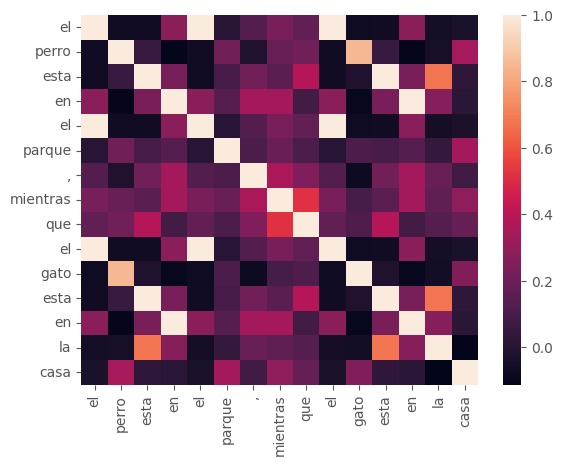

In [29]:
fig, ax = plt.subplots()
sim = cosine_similarity(X)
sns.heatmap(pd.DataFrame(sim, index=words, columns=words), ax=ax)

In [30]:
words

['el',
 'perro',
 'esta',
 'en',
 'el',
 'parque',
 ',',
 'mientras',
 'que',
 'el',
 'gato',
 'esta',
 'en',
 'la',
 'casa']

In [31]:
vocabulary = list(set(words))
token2int = {
    token: i for i, token in enumerate(vocabulary)
}

In [32]:
x = [token2int[token] for token in words]
x_torch = torch.tensor(x, device=torch.device("cuda"))

In [33]:
emb = torch.nn.Embedding(
    num_embeddings = len(vocabulary),
    embedding_dim = 300
).to("cuda")

In [34]:
y = emb(x_torch).detach().clone().to("cpu").numpy()

In [35]:
y.shape

(15, 300)

<Axes: >

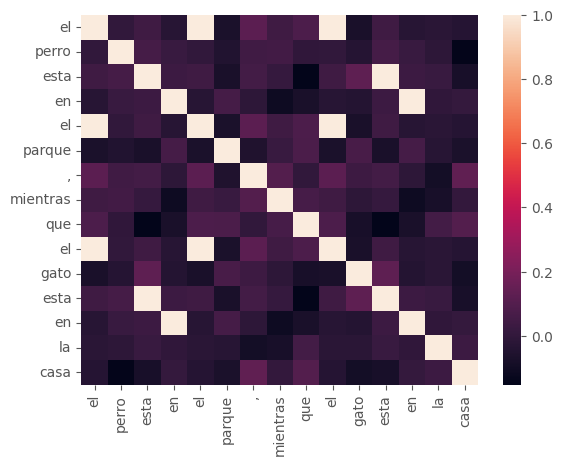

In [36]:
fig, ax = plt.subplots()
sim = cosine_similarity(y)
sns.heatmap(pd.DataFrame(sim, index=words, columns=words), ax=ax)

## Positional Encoding

- Input: `(n_documents, n_context, n_embedding)`

In [37]:
torch.arange(10).double().reshape(-1, 1)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]], dtype=torch.float64)

In [38]:
x = list(range(10))

In [39]:
x[1::2]

[1, 3, 5, 7, 9]

In [40]:
class PositionalEncoding(torch.nn.Module):
    encoding: torch.Tensor

    def __init__(self, embedding_dim: int, context_dim: int):
        super(PositionalEncoding, self).__init__()

        position = torch.arange(context_dim).double().reshape(-1, 1)
        _2i = torch.arange(0, embedding_dim, 2).double()
        encoding = torch.zeros(size=(1, context_dim, embedding_dim))

        encoding[0, :, ::2] = torch.sin(position / 10_000 ** (_2i / embedding_dim))
        encoding[0, :, 1::2] = torch.cos(position / 10_000 ** (_2i / embedding_dim))
        self.register_buffer("encoding", encoding)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        # (n_documents, n_context, n_embedding) + (1, n_context, n_embedding)
        return inputs + self.encoding

In [41]:
pe = PositionalEncoding(embedding_dim=50, context_dim=100)

In [42]:
pe_matrix = pe.encoding.detach().clone().numpy()
pe_matrix.shape

(1, 100, 50)

In [43]:
def generate_bins(embedding_dim: int, context_dim: int) -> torch.Tensor:
    encoding = torch.zeros(size=(context_dim, embedding_dim))
    for i in range(context_dim):
        vals = list(map(int, bin(i)[2:]))
        encoding[i, :len(vals)] = torch.tensor(vals[::-1])
    return encoding

In [44]:
bin_encoding = generate_bins(50, 100)

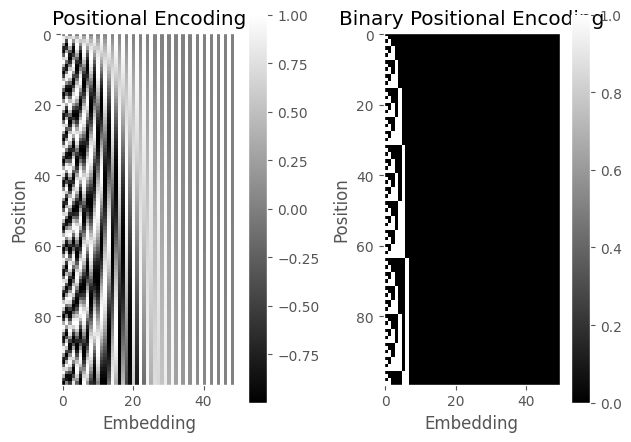

In [45]:
fig, axes = plt.subplots(1, 2)
ax = axes[0]
im = ax.imshow(pe_matrix[0], cmap="gray")
fig.colorbar(im)
ax.set(xlabel="Embedding", ylabel="Position", title="Positional Encoding")
ax.grid(False)

ax = axes[1]
im = ax.imshow(bin_encoding, cmap="gray")
fig.colorbar(im)
ax.set(xlabel="Embedding", ylabel="Position", title="Binary Positional Encoding")
ax.grid(False)

fig.tight_layout()

In [46]:
list(map(int,bin(5)[2:]))

[1, 0, 1]

In [47]:
pe_matrix[0, 50]

array([-0.26237485,  0.964966  , -0.03402279, -0.99942106, -0.9324865 ,
        0.3612049 , -0.75035095, -0.6610397 , -0.89660054,  0.44284022,
        0.997517  , -0.07042598, -0.7179093 ,  0.69613665, -0.606217  ,
       -0.7952993 ,  0.49475715, -0.8690313 ,  0.97023576, -0.24216238,
        0.9508419 ,  0.3096768 ,  0.7636194 ,  0.6456666 ,  0.56557655,
        0.82469577,  0.4039968 ,  0.9147604 ,  0.28376666,  0.95889336,
        0.19774169,  0.9802542 ,  0.13727657,  0.99053276,  0.09512897,
        0.995465  ,  0.06586512,  0.99782854,  0.04558474,  0.9989605 ,
        0.03154263,  0.9995024 ,  0.02182406,  0.9997618 ,  0.01509918,
        0.999886  ,  0.01044629,  0.99994546,  0.00722714,  0.9999739 ],
      dtype=float32)

In [48]:
bin_encoding[50]

tensor([0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

```
0000
0001
0010
0011
0100
```

In [49]:
generate_bins(5, 10)

tensor([[0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [0., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 1., 0.]])

## Atencion

In [50]:
x = torch.tensor([3, 2, 1, 5, 4, 2], dtype=torch.float32)

In [51]:
x.argmax()

tensor(3)

In [52]:
def softmax(z: torch.Tensor) -> torch.Tensor:
    exps = torch.exp(z)
    return exps / exps.sum()

In [53]:
torch.round?

In [54]:
torch.round(softmax(x), decimals=2).sum()

tensor(1.)

In [55]:
# (n_documents, n_context, n_embedding)
embedding = torch.randn(size=(10, 20, 100), device=torch.device("cuda"))

In [56]:
embedding.shape

torch.Size([10, 20, 100])

- Linear:

$$
\mathbf{X} \cdot \mathbf{W} + \mathbf{b}
$$


In [57]:
class ScaledAttention(torch.nn.Module):
    def __init__(self, n_embedding: int, head_size: int):
        super(ScaledAttention, self).__init__()
        self.query = torch.nn.Linear(n_embedding, head_size)
        self.key = torch.nn.Linear(n_embedding, head_size)
        self.value = torch.nn.Linear(n_embedding, head_size)

    def forward(self, embedding: torch.Tensor) -> torch.Tensor:
        query = self.query(embedding)
        key = self.key(embedding)
        value = self.value(embedding)

        # query (n_documents, n_context, n_head) x (n_documents, n_head, n_context)
        # (n_context, n_head) x (n_head, n_context) -> (n_context, n_context)
        _, _, d_k = embedding.shape
        attention = query @ key.transpose(2, 1) * d_k ** (-0.5)
        norm_attention = F.softmax(attention, dim=-1)
        # (n_documents, n_context, n_context) x (n_documents, n_context, n_heads)
        # (n_context, n_context) x (n_context, n_heads) -> (n_context, n_heads)
        return norm_attention @ value

In [58]:
attention = ScaledAttention(100, 50).to("cuda")

In [59]:
attention(embedding).shape

torch.Size([10, 20, 50])

In [60]:
class MultiHeadAttention(torch.nn.Module):
    def __init__(self, n_embedding: int, n_heads: int, head_size: int):
        super(MultiHeadAttention, self).__init__()
        self.heads = torch.nn.ModuleList(
            [
                ScaledAttention(n_embedding, head_size)
                for _ in range(n_heads)
            ])
        self.projection = torch.nn.Linear(n_heads * head_size, n_embedding)

    def forward(self, embedding: torch.Tensor) -> torch.Tensor:
        head_output = torch.cat([h(embedding) for h in self.heads], dim=-1)
        return self.projection(head_output)

In [61]:
attention = MultiHeadAttention(100, 4, 50).to("cuda")

In [62]:
attention(embedding).shape

torch.Size([10, 20, 100])

In [63]:
class FeedForward(torch.nn.Module):
    def __init__(self, n_embedding: int, hidden_dim: int):
        super(FeedForward, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(n_embedding, hidden_dim),
            torch.nn.GELU(),
            torch.nn.Linear(hidden_dim, n_embedding)
        )

    def forward(self, embedding: torch.Tensor) -> torch.Tensor:
        return self.layers(embedding)

In [64]:
class TransformerBlock(torch.nn.Module):
    def __init__(self, n_embedding: int, n_head: int, head_size: int, hidden_dim: int):
        super(TransformerBlock, self).__init__()
        self.multi_head = MultiHeadAttention(n_embedding, n_head, head_size)
        self.feed_forward = FeedForward(n_embedding, hidden_dim)
        self.norm1 = torch.nn.LayerNorm(n_embedding)
        self.norm2 = torch.nn.LayerNorm(n_embedding)

    def forward(self, embedding: torch.Tensor) -> torch.Tensor:
        attention_out = self.norm1(self.multi_head(embedding) + embedding)
        return self.norm2(self.feed_forward(attention_out) + attention_out)

In [65]:
block = TransformerBlock(100, 4, 50, 256).to("cuda")

In [66]:
embedding.shape

torch.Size([10, 20, 100])

In [67]:
block(embedding).shape

torch.Size([10, 20, 100])

## Transformer Generativo

In [68]:
@dataclass
class EmbeddingParams:
    vocab_size: int
    n_embedding: int

@dataclass
class PositionalParams:
    n_context: int

@dataclass
class BlockParams:
    n_blocks: int
    n_head: int
    head_size: int
    hidden_dim: int

@dataclass
class GenerativeTransformerParams:
    embedding_params: EmbeddingParams
    positional_params: PositionalParams
    block_params: BlockParams

In [69]:
class GenerativeTransformer(torch.nn.Module):
    def __init__(self, params: GenerativeTransformerParams):
        super(GenerativeTransformer, self).__init__()
        self.embedding = torch.nn.Embedding(
            num_embeddings=params.embedding_params.vocab_size,
            embedding_dim=params.embedding_params.n_embedding
        )
        self.positional_encoding = PositionalEncoding(
            embedding_dim=params.embedding_params.n_embedding,
            context_dim=params.positional_params.n_context
        )
        self.blocks = torch.nn.Sequential(
            *[TransformerBlock(
                n_embedding=params.embedding_params.n_embedding,
                n_head=params.block_params.n_head,
                head_size=params.block_params.head_size,
                hidden_dim=params.block_params.hidden_dim,
            ) for _ in range(params.block_params.n_blocks)]
        )
        self.output_layer = torch.nn.Linear(
            params.embedding_params.n_embedding,
            params.embedding_params.vocab_size
        )

    def forward(self, tokens: torch.Tensor) -> torch.Tensor:
        embeddings = self.embedding(tokens)
        embeddings_positional = self.positional_encoding(embeddings)
        embeddings_transformed = self.blocks(embeddings_positional)
        return self.output_layer(embeddings_transformed.mean(axis=1))

## Entrenamiento

In [70]:
![[ ! -f poems.csv ]] && unzip archive.zip

In [71]:
poems_df = (
    pd
    .read_csv("poems.csv")
    .dropna()
    .assign(poem_len = lambda df: df.content.str.len())
    .query("poem_len < 500")
)
poems_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1601 entries, 3 to 5132
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   author    1601 non-null   object
 1   content   1601 non-null   object
 2   title     1601 non-null   object
 3   poem_len  1601 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 62.5+ KB


In [72]:
poems_df.head()

,author,content,title,poem_len
3,José María Hinojosa,\n\nLos dedos de la nieve\nrepiquetearon\nen e...,SENCILLEZ,240
4,Rubén Izaguirre Fiallos,"Naciste en Armenia,\npero te fuiste a vivir al...",Breve Carta a Consuelo Suncín,359
5,Leopoldo María Panero,\n\nOscuridad nieve buitres desespero oscurida...,PASADIZO SECRETO,307
6,Gabriela Mistral,\nSiento mi corazón en la dulzura \nfundirse c...,Atardecer,167
12,Juan Ramón Jiménez,\n\nArriba canta el pájaro\ny abajo canta el a...,ÁLAMO BLANCO,360


In [73]:
poems_raw = poems_df.content.to_list()
poems_raw[:5]

['\n\nLos dedos de la nieve\nrepiquetearon\nen el tamboril\ndel espacio.\n\nParábolas de nubes\nforman un halo\nde cristal,\nsobre el monte nevado.\n\nUna línea\ny un plano.\n\nQuiero poner mi vista\nsólo en el espacio,\nque es sencillo\ny a la vez complicado.',
 'Naciste en Armenia,\npero te fuiste a vivir al mundo.\n\nTres nombres: José Vasconcelos, Enrique Gómez Carrillo y Antoine de Saint-Exupéry.\nTres camas, seis piernas.\n\nPara mí, eres la mujer más bella del mundo,\nla insigne guanaquita que pude amar el resto de la vida.\n\nAh, Consuelo Suncín, Condesa de Sonsonate,\nte comiste el mundo,\npara enseñarnos su esqueleto.',
 '\n\nOscuridad nieve buitres desespero oscuridad nueve buitres nieve\nbuitres castillos (murciélagos) os\ncuridad nueve buitres deses\npero nieve lobos casas\nabandonadas ratas desespero o\nscuridad nueve buitres des\n"buitres", "caballos", "el monstruo es verde", "desespero"\nbien planeada oscuridad\nDecapitaciones.',
 '\nSiento mi corazón en la dulzura \nfu

In [74]:
clean_regex = re.compile(r"[^a-zA-Z\.,\-'\" \n!?¡¿ñáéíóú]")
spaces_regex = re.compile(r" +")
def preprocess(text: str) -> str:
    clean_text = re.sub(clean_regex, " ", text)
    strip_text = clean_text.strip()
    spaces_text = re.sub(spaces_regex, " ", strip_text)
    return spaces_text

In [75]:
print(preprocess(poems_raw[2]))

Oscuridad nieve buitres desespero oscuridad nueve buitres nieve
buitres castillos murciélagos os
curidad nueve buitres deses
pero nieve lobos casas
abandonadas ratas desespero o
scuridad nueve buitres des
"buitres", "caballos", "el monstruo es verde", "desespero"
bien planeada oscuridad
Decapitaciones.


In [76]:
for poem in poems_raw:
    if not isinstance(poem, str):
        print(poem)

In [77]:
preprocess_poems = list(map(preprocess, poems_raw))

- Tokens palabra

In [78]:
word_tokens_poems = list(map(
    lambda text: nltk.word_tokenize(text, language="spanish"),
    preprocess_poems
    ))

In [79]:
word_tokens_poems[0][:10]

['Los',
 'dedos',
 'de',
 'la',
 'nieve',
 'repiquetearon',
 'en',
 'el',
 'tamboril',
 'del']

In [80]:
set([1, 1, 2, 2, 2, 3]) | set([1, 1, 4, 4, 4, 5])

{1, 2, 3, 4, 5}

In [81]:
local_word_vocab = list(map(set, word_tokens_poems))
local_word_vocab[0]

{',',
 '.',
 'Los',
 'Parábolas',
 'Quiero',
 'Una',
 'a',
 'complicado',
 'cristal',
 'de',
 'dedos',
 'del',
 'el',
 'en',
 'es',
 'espacio',
 'forman',
 'halo',
 'la',
 'línea',
 'mi',
 'monte',
 'nevado',
 'nieve',
 'nubes',
 'plano',
 'poner',
 'que',
 'repiquetearon',
 'sencillo',
 'sobre',
 'sólo',
 'tamboril',
 'un',
 'vez',
 'vista',
 'y'}

In [82]:
nums = list(range(1, 10))

acum = 1.0
for num in nums:
    acum *= num

In [83]:
acum

362880.0

In [84]:
reduce(lambda acum, num: acum * num, nums, 1.0)

362880.0

In [85]:
vocab = reduce(
    lambda acum, tokens: acum | tokens,
    local_word_vocab, set()
    )

In [86]:
len(vocab)

16378

- Tokens caracter:

In [87]:
list("hello world")

['h', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']

In [88]:
char_tokens_poems = list(map(
    list,
    preprocess_poems
    ))

In [89]:
char_tokens_poems[0][:10]

['L', 'o', 's', ' ', 'd', 'e', 'd', 'o', 's', ' ']

In [90]:
local_char_vocab = list(map(set, char_tokens_poems))

In [91]:
vocab = list(reduce(
    lambda acum, tokens: acum | tokens,
    local_char_vocab, set()
    ))

vocab_size = len(vocab) + 3
char2int = {c : index + 3 for index, c in enumerate(vocab)}
char2int["^"] = 0
char2int["$"] = 1
char2int["_"] = 2

int2char = {v: k for k, v in char2int.items()}
print(vocab_size)

72


In [92]:
char2int

{'?': 3,
 'ó': 4,
 'Z': 5,
 '\n': 6,
 '.': 7,
 'A': 8,
 '¿': 9,
 'V': 10,
 'j': 11,
 'Q': 12,
 'c': 13,
 'P': 14,
 'h': 15,
 'D': 16,
 'X': 17,
 'S': 18,
 'f': 19,
 '!': 20,
 'á': 21,
 'Y': 22,
 's': 23,
 'y': 24,
 'a': 25,
 'B': 26,
 'b': 27,
 'K': 28,
 'l': 29,
 '"': 30,
 'ú': 31,
 'm': 32,
 'I': 33,
 'L': 34,
 'U': 35,
 "'": 36,
 't': 37,
 'N': 38,
 'u': 39,
 '¡': 40,
 'ñ': 41,
 'M': 42,
 'F': 43,
 'p': 44,
 'W': 45,
 'é': 46,
 'i': 47,
 'C': 48,
 'z': 49,
 'k': 50,
 ',': 51,
 'í': 52,
 'J': 53,
 'q': 54,
 'd': 55,
 '-': 56,
 ' ': 57,
 'E': 58,
 'v': 59,
 'x': 60,
 'O': 61,
 'G': 62,
 'e': 63,
 'o': 64,
 'R': 65,
 'n': 66,
 'w': 67,
 'r': 68,
 'H': 69,
 'g': 70,
 'T': 71,
 '^': 0,
 '$': 1,
 '_': 2}

In [93]:
def tokenize(text: str) -> NDArray[np.int32]:
    tokens = map(lambda char: char2int[char], text)
    return np.array([0, *tokens, 1])

In [94]:
def detokenize(tokens: NDArray[np.int32]) -> str:
    chars = map(lambda token: int2char[token], tokens)
    return "".join(chars)

In [95]:
tokenize("hola mundo")

array([ 0, 15, 64, 29, 25, 57, 32, 39, 66, 55, 64,  1])

In [96]:
detokenize(tokenize("hola mundo"))

'^hola mundo$'

In [97]:
tokenized_poems = list(map(tokenize, preprocess_poems))

In [98]:
print(tokenized_poems[1])

[ 0 38 25 13 47 23 37 63 57 63 66 57  8 68 32 63 66 47 25 51  6 44 63 68
 64 57 37 63 57 19 39 47 23 37 63 57 25 57 59 47 59 47 68 57 25 29 57 32
 39 66 55 64  7  6  6 71 68 63 23 57 66 64 32 27 68 63 23 57 53 64 23 46
 57 10 25 23 13 64 66 13 63 29 64 23 51 57 58 66 68 47 54 39 63 57 62  4
 32 63 49 57 48 25 68 68 47 29 29 64 57 24 57  8 66 37 64 47 66 63 57 55
 63 57 18 25 47 66 37 56 58 60 39 44 46 68 24  7  6 71 68 63 23 57 13 25
 32 25 23 51 57 23 63 47 23 57 44 47 63 68 66 25 23  7  6  6 14 25 68 25
 57 32 52 51 57 63 68 63 23 57 29 25 57 32 39 11 63 68 57 32 21 23 57 27
 63 29 29 25 57 55 63 29 57 32 39 66 55 64 51  6 29 25 57 47 66 23 47 70
 66 63 57 70 39 25 66 25 54 39 47 37 25 57 54 39 63 57 44 39 55 63 57 25
 32 25 68 57 63 29 57 68 63 23 37 64 57 55 63 57 29 25 57 59 47 55 25  7
  6  6  8 15 51 57 48 64 66 23 39 63 29 64 57 18 39 66 13 52 66 51 57 48
 64 66 55 63 23 25 57 55 63 57 18 64 66 23 64 66 25 37 63 51  6 37 63 57
 13 64 32 47 23 37 63 57 63 29 57 32 39 66 55 64 51

In [99]:
def generate_sequence(
        tokens: NDArray[np.int32],
        context_size: int
        ) -> tuple[torch.Tensor, torch.Tensor]:
    padded_tokens = [
        *(2 for _ in range(context_size - 1)),
        *tokens
        ]
    sequence_in = []
    sequence_out = []
    for i in range(len(padded_tokens) - context_size):
        sequence_in.append(
            padded_tokens[i: i + context_size]
        )
        sequence_out.append(padded_tokens[i + context_size])
    return (
        torch.tensor(sequence_in),
        torch.tensor(sequence_out)
    )


In [100]:
sequence_in, sequence_out = generate_sequence(tokenized_poems[1], 5)

In [101]:
sequence_in[:5]

tensor([[ 2,  2,  2,  2,  0],
        [ 2,  2,  2,  0, 38],
        [ 2,  2,  0, 38, 25],
        [ 2,  0, 38, 25, 13],
        [ 0, 38, 25, 13, 47]])

In [102]:
sequence_out[:5]

tensor([38, 25, 13, 47, 23])

In [103]:
sequence_in, sequence_out = generate_sequence(tokenized_poems[1], 50)

In [104]:
sequence_in.shape

torch.Size([359, 50])

In [105]:
detokenize(sequence_in[300].numpy())

'o de la vida.\n\nAh, Consuelo Suncín, Condesa de Son'

In [106]:
detokenize(sequence_out[300: 301].numpy())

's'

In [107]:
len(tokenized_poems)

1601

In [108]:
train_cut = int(len(tokenized_poems) * 0.8)
train_tokenized_poems = tokenized_poems[:train_cut]
test_tokenized_poems = tokenized_poems[train_cut:]

In [109]:
len(train_tokenized_poems)

1280

In [110]:
len(test_tokenized_poems)

321

In [111]:
def make_data_generator(
        tokenized_dataset: list[NDArray[np.int32]],
        context_size: int
        ) -> Iterator[tuple[torch.Tensor, torch.Tensor]]:
    while True:
        for poem_id in range(len(tokenized_dataset)):
            yield generate_sequence(
                tokenized_dataset[poem_id], context_size
                )

In [112]:
train_gen = make_data_generator(train_tokenized_poems, 50)
test_gen = make_data_generator(test_tokenized_poems, 50)

In [113]:
def my_generator():
    num = 0
    while True:
        yield num
        num += 2

In [114]:
type(my_generator)

function

In [115]:
gen = my_generator()
count = 0
for val in gen:
    if count == 5: break
    print(val)
    count += 1


0
2
4
6
8


Modelo:

In [116]:
params = GenerativeTransformerParams(
    embedding_params=EmbeddingParams(vocab_size=vocab_size, n_embedding=256),
    positional_params=PositionalParams(n_context=50),
    block_params=BlockParams(n_blocks=8, n_head=8, head_size=64, hidden_dim=128)
)

In [117]:
model = GenerativeTransformer(params).to("cuda")

In [118]:
sum(p.numel() for p in model.parameters())

4781128

In [119]:
def loss(
        x_batch: torch.Tensor,
        y_batch: torch.Tensor,
        model: torch.nn.Module) -> torch.Tensor:
    y_pred = model(x_batch) # output logits (probabilities = softmax(logits))
    loss_value = F.cross_entropy(y_pred, y_batch)
    return loss_value

In [120]:
N_ITERS = 5000
LEARNING_RATE = 1e-7

In [121]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [122]:
train_loss, test_loss = [], []
iterable = tqdm(range(N_ITERS))
for _ in iterable:
    # TRAIN
    batch_x, batch_y = next(train_gen)
    batch_x_gpu, batch_y_gpu = batch_x.to("cuda"), batch_y.to("cuda")
    loss_val = loss(batch_x_gpu, batch_y_gpu, model)
    loss_val.backward()
    optimizer.step()

    train_loss.append(loss_val.detach().cpu().numpy())

    # TEST
    batch_x, batch_y = next(test_gen)
    batch_x_gpu, batch_y_gpu = batch_x.to("cuda"), batch_y.to("cuda")
    loss_val = loss(batch_x_gpu, batch_y_gpu, model)
    test_loss.append(loss_val.detach().cpu().numpy())

  0%|          | 0/5000 [00:00<?, ?it/s]

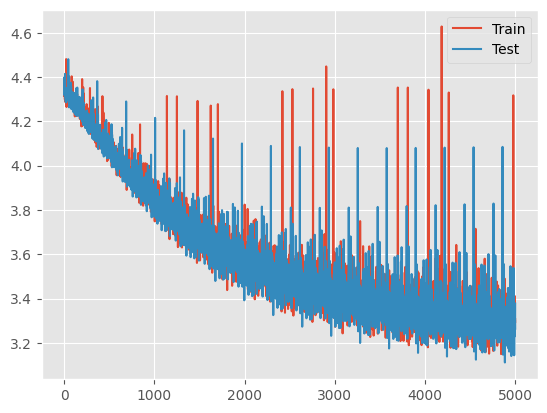

In [123]:
fig, ax = plt.subplots()
ax.plot(train_loss, label="Train")
ax.plot(test_loss, label="Test")
ax.legend()

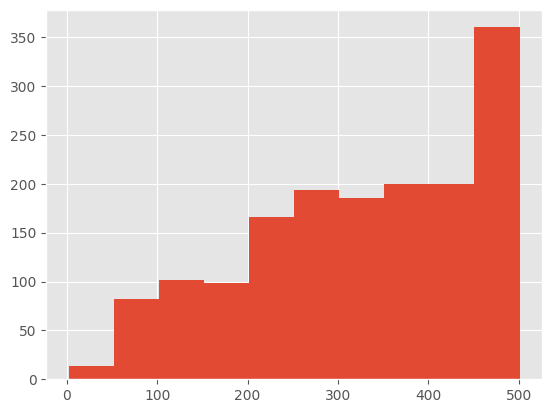

In [124]:
fig, ax = plt.subplots()
ax.hist(list(map(len, tokenized_poems)));

## Generacion

In [125]:
def generate(
        tokens: list[int], model: torch.nn.Module, max_tokens: int = 1000
        ) -> str:
    outputs = []
    for i in range(max_tokens):
        model_input = torch.tensor(tokens, device=torch.device("cuda")).reshape(1, -1)
        probs = F.softmax(model(model_input), dim=-1).detach().cpu().numpy().flatten()
        generated_token = int(np.random.choice(np.arange(probs.size), p = probs))
        outputs.append(generated_token)
        if generated_token == 1:
            return detokenize(np.array(outputs))
        tokens = [*tokens[1:], generated_token]
    return detokenize(np.array(outputs))

In [126]:
test_input = [*(2 for _ in range(49)), 0]

In [127]:
print(generate(test_input, model))

aeea Rdmsr,lusp sTn_xnt
 l¡ eSmuM^uho $


In [128]:
import pickle

In [129]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [130]:
!ls -sh

total 26M
2.2M archive.zip   19M model.pkl  5.0M poems.csv  4.0K sample_data


In [131]:
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [132]:
type(loaded_model)

__main__.GenerativeTransformer